# TITANIC CLASSIFICATION
 Algorithm which tells whether the person will be save from sinking or not

 ## 1. Data Loading and Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings. filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/thero/Downloads/titanic_data.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked.    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['Age'].mean()

29.69911764705882

In [8]:
def male_female_child(Passenger):
    # take the age and sex
    age, sex = Passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    

In [9]:
df['Person'] = df[['Age','Sex']].apply(male_female_child, axis=1)

In [10]:
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [11]:
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [12]:
df['Pclass'].isnull().sum()

0

## 2. Exploring Missing data

In [13]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Cabin          77.104377
Age            19.865320
Embarked.       0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Person          0.000000
dtype: float64

In [14]:
df.drop(columns= 'Cabin', axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked.', 'Person'],
      dtype='object')

In [15]:
df = df.rename(columns={'Embarked.' : 'Embarked'})

In [16]:
# Filling Null Values in Age column with mean values of age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# filling null values in Embarked Column with mode values of embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Person         0
dtype: int64

In [18]:
df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [19]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [20]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [22]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [23]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [24]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [25]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Dropping Some Unnecessary Columns
```There are 3 columns i.e.. 'PassengerId' , 'Name' , 'Ticket' are unnecessary columns which have no use in data modelling . So, we will drop these 3 columns```

In [26]:
df.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Person    891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [28]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# information about categorical columns
df.describe(include='O')

,Sex,Embarked,Person
count,891,891,891
unique,2,3,3
top,male,S,male
freq,577,646,537


In [30]:
df.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Person'], dtype=object)

<Axes: xlabel='Survived', ylabel='Fare'>

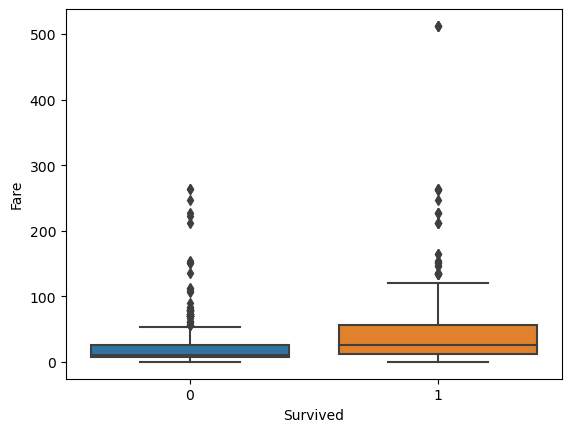

In [31]:
sns.boxplot(x='Survived', y='Fare', data=df)

<Axes: >

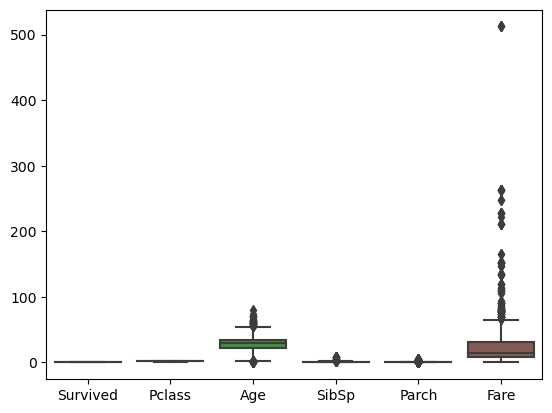

In [32]:
sns.boxplot(df)

### Passengers who paid over 300

In [33]:
df[df['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
258,1,1,female,35.0,0,0,512.3292,C,female
679,1,1,male,36.0,0,1,512.3292,C,male
737,1,1,male,35.0,0,0,512.3292,C,male


# 3. Data Visualization 

### Checking Males and Females 

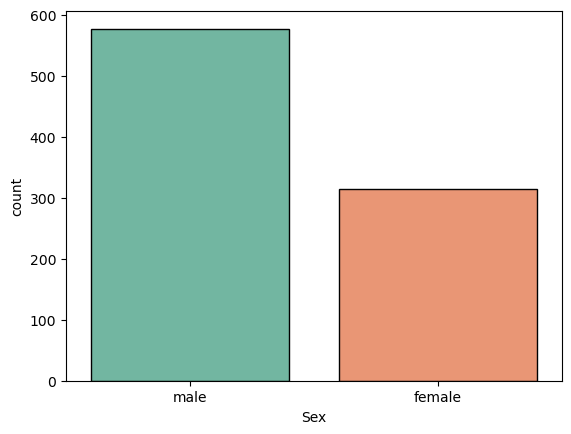

In [34]:
# sns.set(style = 'darkgrid')
#plt.figure(figsize=(4,4))
sns.countplot(x='Sex', data=df, palette='Set2',edgecolor=(0,0,0), linewidth=1)
plt.show()

### Survival Rate Bases On Gender

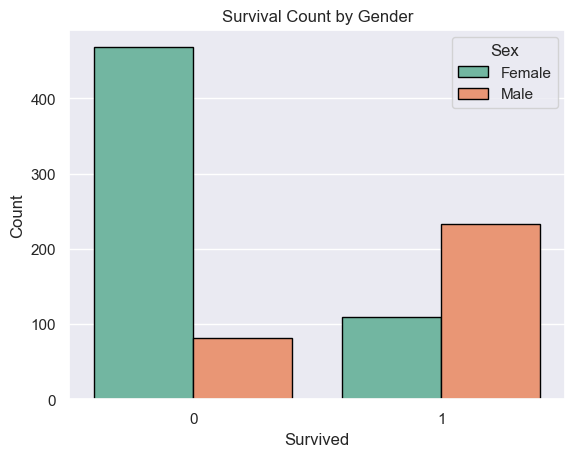

In [35]:
sns.set(style='darkgrid')
sns.countplot(x='Survived',hue='Sex', data=df, palette='Set2',edgecolor=(0,0,0), linewidth=1)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Gender')

# Show the plot
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.show()
plt.show()

## Genders in different embarks

<Axes: xlabel='Embarked', ylabel='count'>

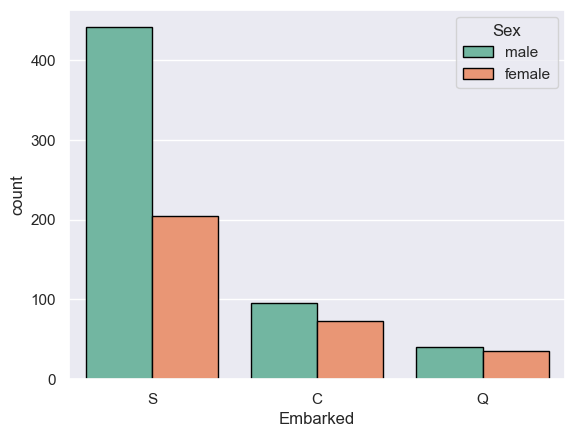

In [36]:
sns.countplot(x='Embarked', hue='Sex', data=df, palette='Set2',edgecolor=(0,0,0), linewidth=1)

## Different genders in different Passenger class 

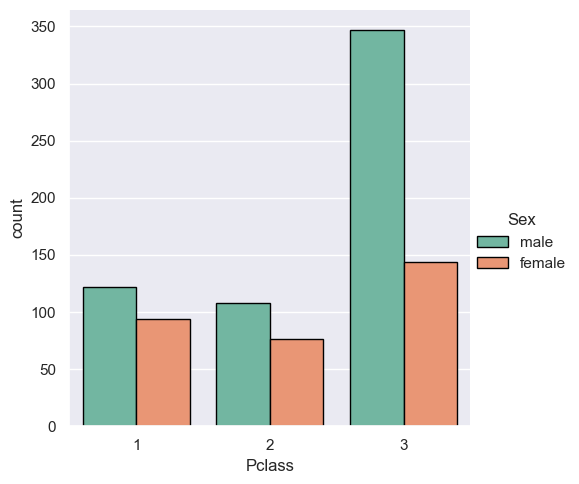

In [37]:
sns.catplot(x='Pclass', kind='count',hue='Sex',data=df,palette='Set2',edgecolor=(0,0,0), linewidth=1)

## Different age groups

<Axes: xlabel='Age', ylabel='Density'>

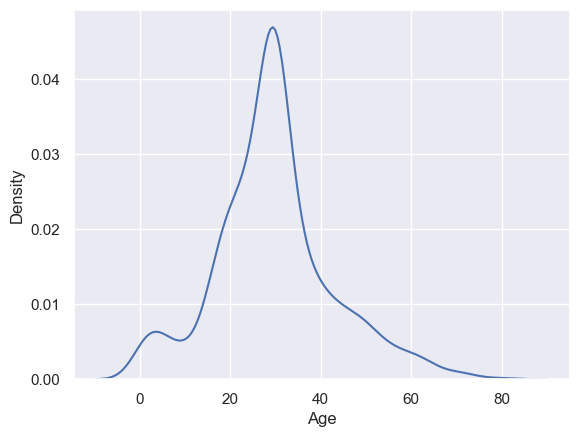

In [38]:
sns.kdeplot(x='Age', data=df)

```From this plot it came to know that most of the people lie between 20-40 age group.```

Analysing Target Variable

Survived Column

## Survival according to genders

0    549
1    342
Name: Survived, dtype: int64


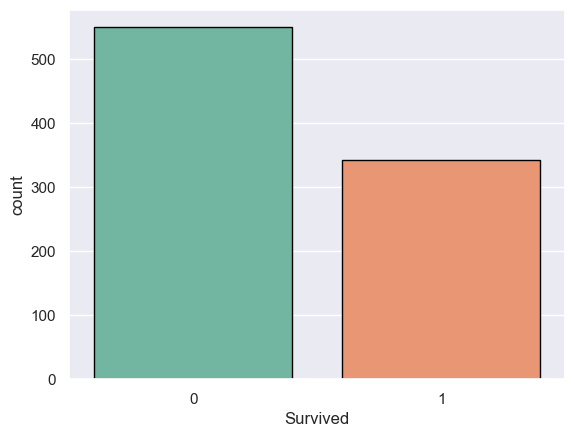

In [39]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df, palette='Set2',edgecolor=(0,0,0), linewidth=1)
plt.show()

## Survival according to Siblings

<Axes: xlabel='SibSp', ylabel='count'>

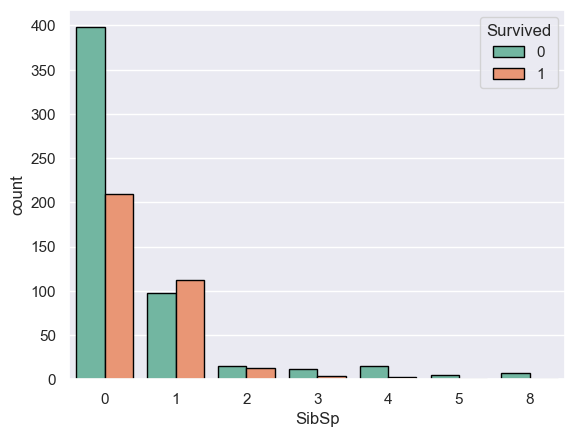

In [40]:
sns.countplot(x='SibSp', hue='Survived', data=df, palette='Set2',edgecolor=(0,0,0), linewidth=1)

<Axes: xlabel='Age', ylabel='Density'>

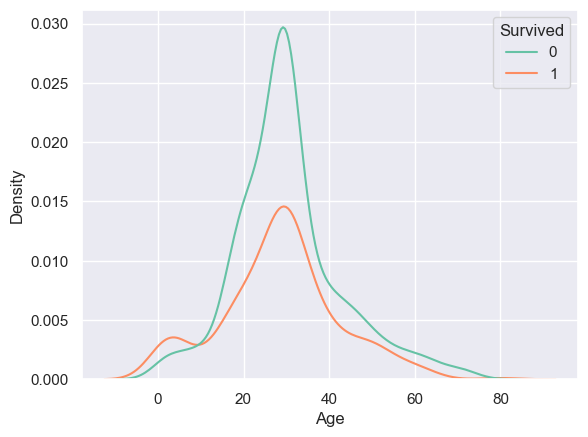

In [41]:
sns.kdeplot(x='Age', hue= 'Survived', data=df, palette='Set2')

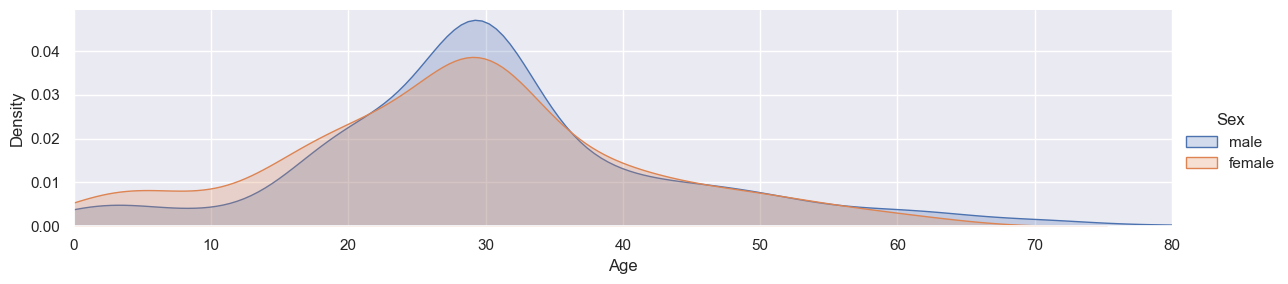

In [42]:
fig = sns.FacetGrid(df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

This Plot showing Outliers in 2 columns i.e.. Age and Fare

In [43]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

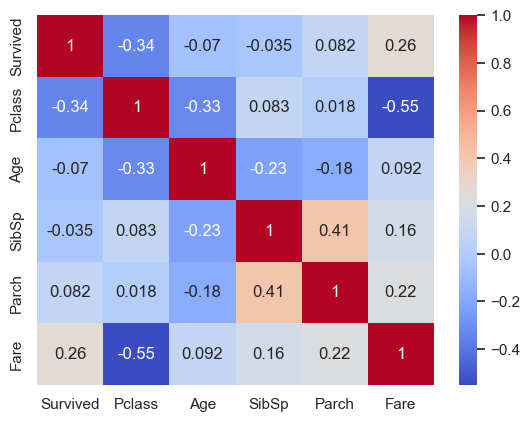

In [44]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

This Plot is clearly showing
<ul>
<li>Strong Positive Correlation between SibSp and Parch</li>
<li>Positive Correlation between Survived and Fare</li>
<li>Strong Negative Correlation between Pclass and Fare</li>
</ul>
  

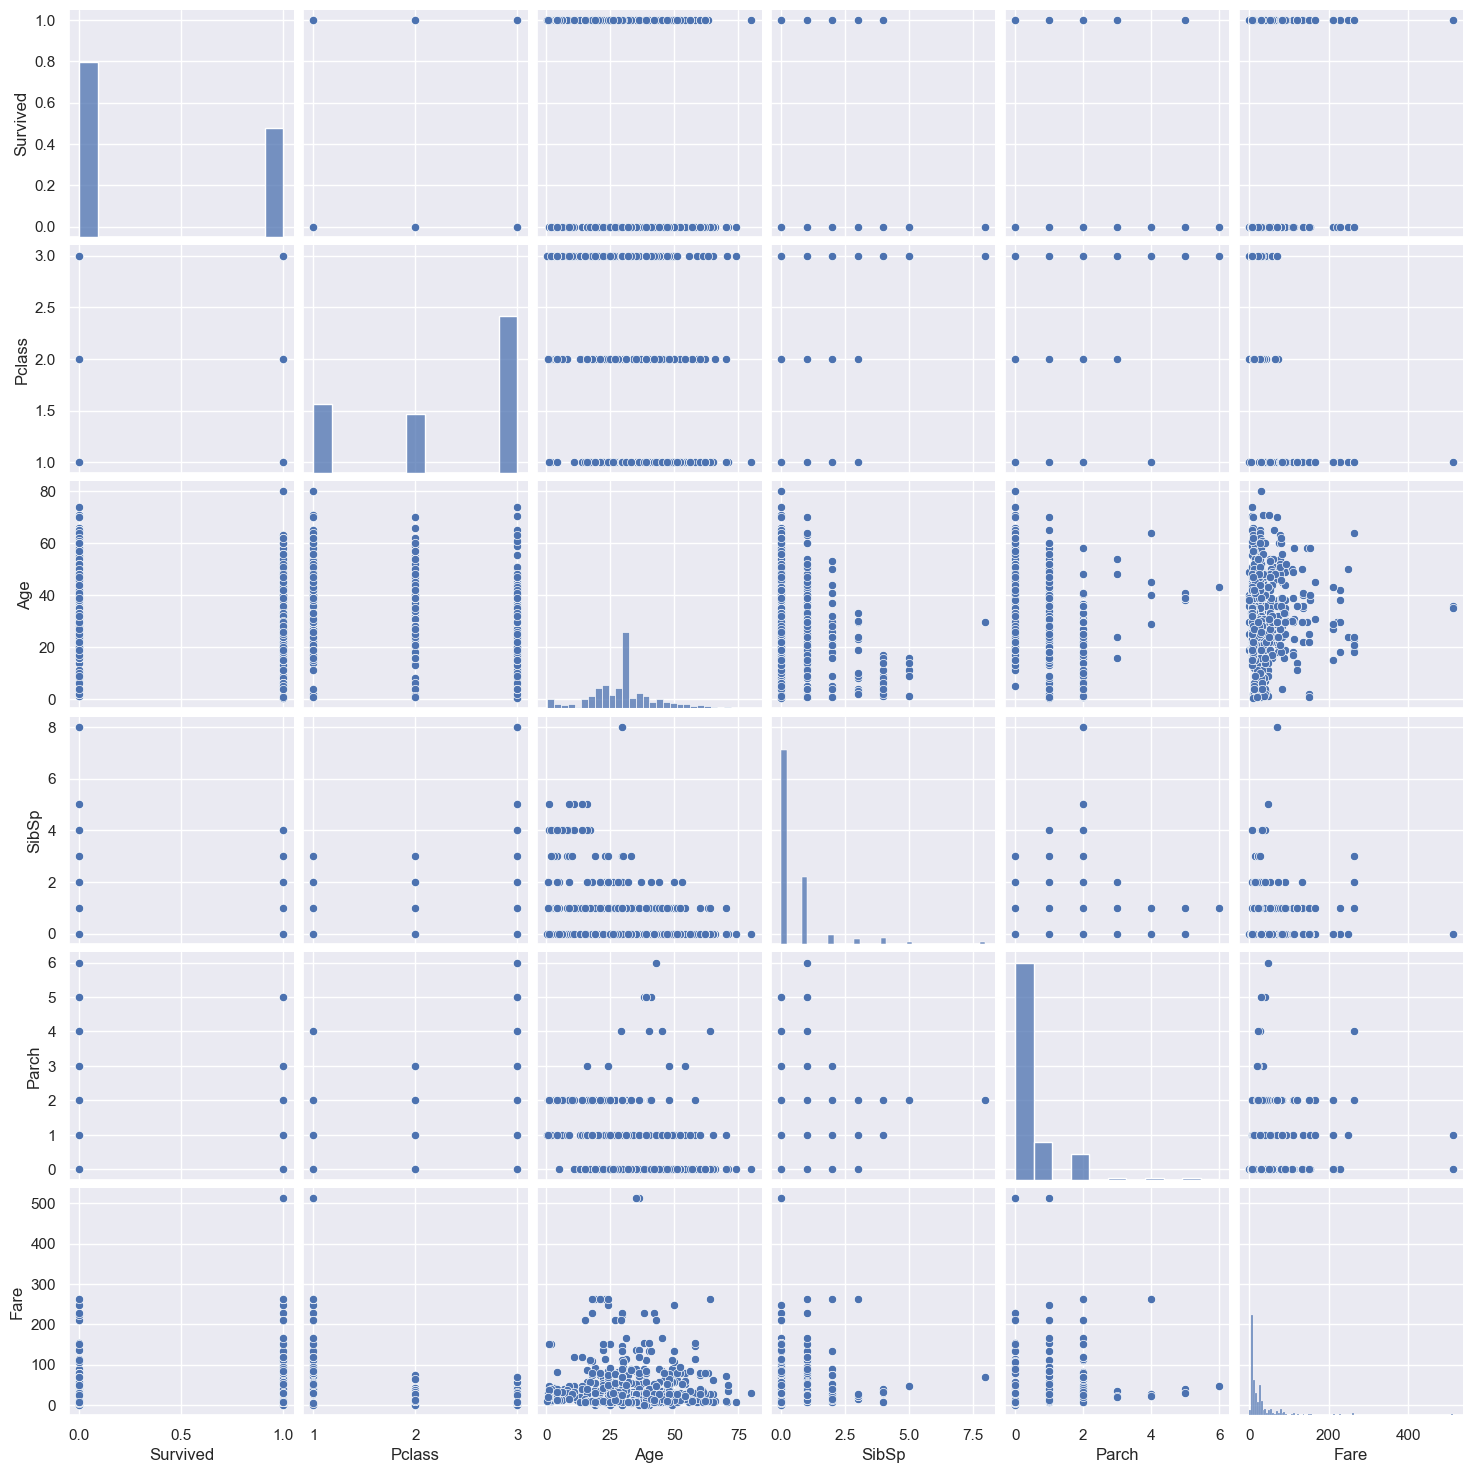

In [45]:
sns.pairplot(df)

# Checking the target variable

In [46]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

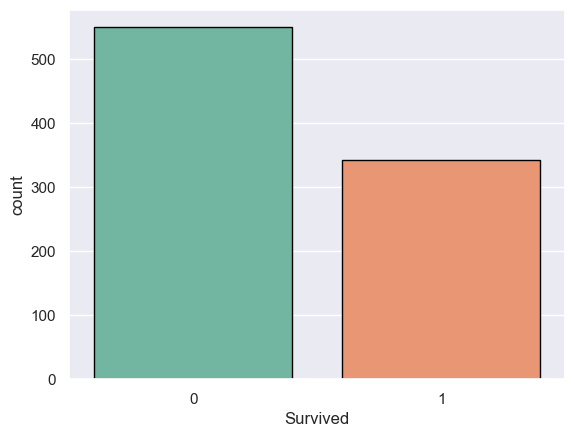

In [47]:
sns.countplot(x='Survived', data=df, palette='Set2',edgecolor=(0,0,0), linewidth=1)

### Sex
Convert feature 'Sex' into numeric values 
<ul> 
  <li>
male = 1
 </li>
 <li>
female = 0
 </li>  
   </ul> 

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ['Sex','Embarked']:
    df[column] = le.fit_transform(df[column])
    
df.head(10)    

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,0,3,1,22.000000,1,0,7.2500,2,male
1,1,1,0,38.000000,1,0,71.2833,0,female
2,1,3,0,26.000000,0,0,7.9250,2,female
3,1,1,0,35.000000,1,0,53.1000,2,female
4,0,3,1,35.000000,0,0,8.0500,2,male
5,0,3,1,29.699118,0,0,8.4583,1,male
6,0,1,1,54.000000,0,0,51.8625,2,male
7,0,3,1,2.000000,3,1,21.0750,2,child
8,1,3,0,27.000000,0,2,11.1333,2,female
9,1,2,0,14.000000,1,0,30.0708,0,child


In [49]:
df['Fare'] = df['Fare'].astype(int)

In [50]:
df['Age'] = df['Age'].astype(int)

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,0,3,1,22,1,0,7,2,male
1,1,1,0,38,1,0,71,0,female
2,1,3,0,26,0,0,7,2,female
3,1,1,0,35,1,0,53,2,female
4,0,3,1,35,0,0,8,2,male
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2,male
887,1,1,0,19,0,0,30,2,female
888,0,3,0,29,1,2,23,2,female
889,1,1,1,26,0,0,30,0,male


## Saving children first

In [52]:
df[df['Age']<10].groupby(['Sex','Pclass']).mean()

Survived       Age     SibSp     Parch        Fare  Embarked
Sex Pclass                                                              
0   1       0.000000  2.000000  1.000000  2.000000  151.000000  2.000000
    2       1.000000  4.875000  0.750000  1.500000   30.125000  1.750000
    3       0.523810  4.285714  1.857143  1.380952   20.809524  1.428571
1   1       1.000000  2.000000  0.500000  2.000000  116.000000  2.000000
    2       1.000000  2.000000  0.888889  1.222222   27.000000  1.777778
    3       0.380952  4.523810  2.857143  1.380952   27.000000  1.714286

<b>Children below 18 years</b> of age have higher chances of surviving, proven they saved childen first

# Data Modeling

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [54]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[cols]
y = df['Survived']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [55]:
x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,2
1,1,0,38,1,0,71,0
2,3,0,26,0,0,7,2
3,1,0,35,1,0,53,2
4,3,1,35,0,0,8,2


In [56]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.10, random_state=1)
print(x_train.shape,'\n',
     x_test.shape,'\n',
     y_train.shape,'\n',
     y_test.shape)

(801, 7) 
 (90, 7) 
 (801,) 
 (90,)


In [58]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))   

 ## 1. Logistic Regression </li>

In [59]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [60]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [61]:
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [62]:
accuracy = accuracy_score(y_test, ypred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.7666666666666667


In [63]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = round(accuracy_score(y_test,ypred_lr) * 100 ,2) 
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 76.67


##  2. DecisionTree Classifier 

In [64]:
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [65]:
mscore(dt)

Training Score 0.850187265917603
Testing Score 0.7777777777777778


In [66]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]


In [67]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = round(accuracy_score(y_test,ypred_dt) *100,2)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[50  3]
 [17 20]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        53
           1       0.87      0.54      0.67        37

    accuracy                           0.78        90
   macro avg       0.81      0.74      0.75        90
weighted avg       0.80      0.78      0.76        90

Accuracy Score 77.78


## KNN Classifier

In [68]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [71]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.7815230961298377
Testing Score 0.6888888888888889


In [72]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [75]:

# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = round(accuracy_score(y_test,ypred_knn) *100,2)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[48  5]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.91      0.77        53
           1       0.74      0.38      0.50        37

    accuracy                           0.69        90
   macro avg       0.71      0.64      0.64        90
weighted avg       0.70      0.69      0.66        90

Accuracy Score 68.89


In [76]:
models = pd.DataFrame(
{
    'Model':['Logistic Regression','Decision Tree','knn'],
    'Score':[acc_lr, acc_dt,acc_knn]
})

models.sort_values(by= 'Score', ascending= False)

,Model,Score
1,Decision Tree,77.78
0,Logistic Regression,76.67
2,knn,68.89


In [77]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(dt, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[459,  37],
       [100, 205]], dtype=int64)

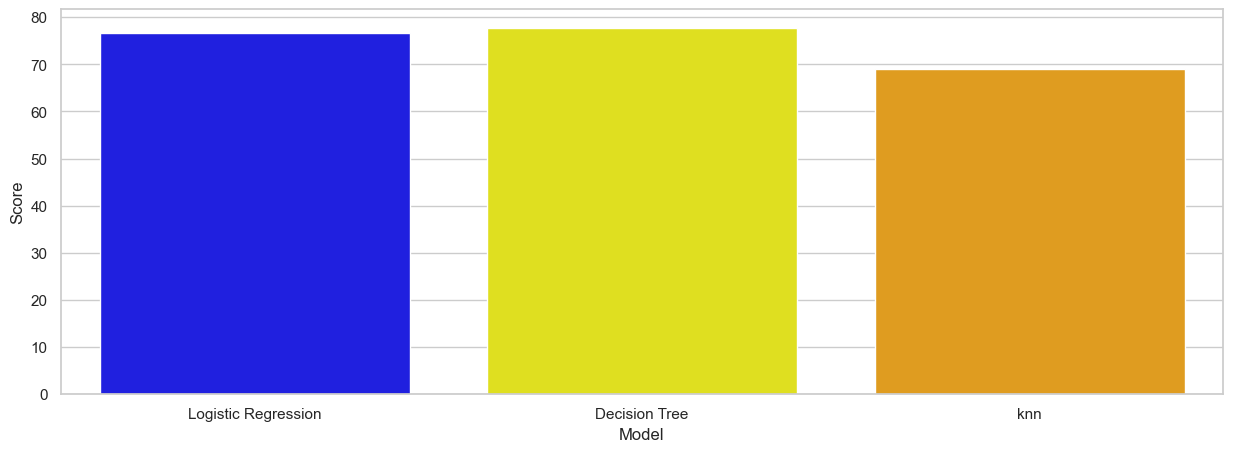

In [79]:
colors = ["blue", "yellow","orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

<b> DecisionTree Classifier Model got the Highest Accuracy